In [351]:
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [352]:
load_dotenv()

True

Задаём переменные окружения

In [353]:
DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')

Проверяем что получилось

In [354]:
print(DATE_BEGIN, DATE_END, API_URL)

2023-03-01 2023-09-01 https://data-charts-api.hexlet.app


Зададим переменные для запросов

In [355]:
dates = {'begin': DATE_BEGIN, 'end': DATE_END}

Проверяем что получилось

In [356]:
print(dates)

{'begin': '2023-03-01', 'end': '2023-09-01'}


Запросим данные по визитам, преобразуем их из json, преобразуем в df

In [357]:
visits_request = requests.get(f'{API_URL}/visits', params=dates)
visits_data = visits_request.json()
visits_df = pd.DataFrame(visits_data)

Проверяем что получилось

In [358]:
visits_df.info

<bound method DataFrame.info of                                     visit_id platform  \
0       1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1       f149f542-e935-4870-9734-6b4501eaf614      web   
2       08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
3       19322fed-157c-49c6-b16e-2d5cabeb9592      web   
4       04762a22-3c9f-40c9-9ac9-6628c4381836      web   
...                                      ...      ...   
263454  6d2e2f5b-970b-4dfe-8f57-25711a5b2a5d      web   
263455  1d91535e-d984-4f76-bbaa-c14c0fd4f2e2      web   
263456  f2496721-7126-430d-976e-777a6cdccb4f      web   
263457  f2496721-7126-430d-976e-777a6cdccb4f      web   
263458  73047125-de44-4d65-8229-7218acff4ddc      web   

                                               user_agent             datetime  
0       Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1       Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2       Mozilla/5.0 (Macintosh; Intel Ma

Запросим данные по регистрациям, преобразуем их из json, преобразуем в df

In [359]:
registrations_request = requests.get(f'{API_URL}/registrations', params=dates)
registrations_data = registrations_request.json()
registrations_df = pd.DataFrame(registrations_data)

Проверяем что получилось

In [360]:
registrations_df.info

<bound method DataFrame.info of                   datetime                               user_id  \
0      2023-03-01T07:40:13  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
1      2023-03-01T13:14:00  f007f97c-9d8b-48b5-af08-119bb8f6d9b6   
2      2023-03-01T03:05:50  24ff46ae-32b3-4a74-8f27-7cf0b8f32f15   
3      2023-03-01T00:04:47  3e9914e1-5d73-4c23-b25d-b59a3aeb2b60   
4      2023-03-01T18:31:52  27f875fc-f8ce-4aeb-8722-0ecb283d0760   
...                    ...                                   ...   
21831  2023-08-31T07:32:08  a94b4a28-f25c-433c-b4ef-85af7d5b0c11   
21832  2023-08-31T23:25:50  fc709c6b-528b-40d8-8980-c2c278e5a628   
21833  2023-08-31T19:29:18  11e32805-7571-4108-8e50-e211d051bf7e   
21834  2023-08-31T19:38:54  bce7b818-768b-434a-b6af-573cd60bff7f   
21835  2023-08-31T08:36:05  fe03e08a-8e86-4b5f-9a50-c18a02b0d234   

                            email platform registration_type  
0               ebyrd@example.org      web            google  
1        knightgerald@exa

Удалим боты из визитов

In [361]:
visits_df = visits_df[~visits_df['user_agent'].str.contains('bot', case=False, na=False)]

Проверим, что стало меньше визитов

In [362]:
visits_df.info

<bound method DataFrame.info of                                     visit_id platform  \
0       1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1       f149f542-e935-4870-9734-6b4501eaf614      web   
2       08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
3       19322fed-157c-49c6-b16e-2d5cabeb9592      web   
4       04762a22-3c9f-40c9-9ac9-6628c4381836      web   
...                                      ...      ...   
263454  6d2e2f5b-970b-4dfe-8f57-25711a5b2a5d      web   
263455  1d91535e-d984-4f76-bbaa-c14c0fd4f2e2      web   
263456  f2496721-7126-430d-976e-777a6cdccb4f      web   
263457  f2496721-7126-430d-976e-777a6cdccb4f      web   
263458  73047125-de44-4d65-8229-7218acff4ddc      web   

                                               user_agent             datetime  
0       Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1       Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2       Mozilla/5.0 (Macintosh; Intel Ma

Отбросим все визиты кроме последнего, возьмём только нужные колонки

In [363]:
visits_sorted = visits_df.sort_values('datetime') 
visits_last = visits_sorted.drop_duplicates(subset="visit_id", keep="last")
visits_last.head(10)

,visit_id,platform,user_agent,datetime
271,348148db-9841-4b42-a0e1-7631f4667f83,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T00:03:08
81,65f98235-9667-460c-964e-5604b75b48a1,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:03:57
55,31d17176-658a-425d-99ee-50c433af81d9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:11:30
191,52bc1d7e-6c8a-474b-82a6-73a4adfd4423,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T00:26:05
119,3ac77737-906e-46f2-9cd0-a52354c2676f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:30:52
324,a7b9d67f-7fe2-42b8-b375-5d766ebac30e,android,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-A54...,2023-03-01T00:31:38
69,ea60312b-25f5-47a0-8ac7-4fe0c2064f3e,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:34:27
127,21010857-5395-4630-96bd-24ccda69d41c,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:37:20
40,d11776a4-d157-43e0-a077-41867c362491,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:38:04
135,85714ac2-f08a-4d09-b095-4d9a589faaa2,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-01T00:42:07


In [364]:
print(visits_last['datetime'].dtypes)

object


Приведём datetime к дате, отбросим лишнее

In [365]:
visits_last.loc[:, 'date_group'] = pd.to_datetime(visits_last['datetime']).dt.date
visits_last.head(10)

C:\Users\michas91\AppData\Local\Temp\ipykernel_7368\276471367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_last.loc[:, 'date_group'] = pd.to_datetime(visits_last['datetime']).dt.date


,visit_id,platform,user_agent,datetime,date_group
271,348148db-9841-4b42-a0e1-7631f4667f83,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T00:03:08,2023-03-01
81,65f98235-9667-460c-964e-5604b75b48a1,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:03:57,2023-03-01
55,31d17176-658a-425d-99ee-50c433af81d9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:11:30,2023-03-01
191,52bc1d7e-6c8a-474b-82a6-73a4adfd4423,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T00:26:05,2023-03-01
119,3ac77737-906e-46f2-9cd0-a52354c2676f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:30:52,2023-03-01
324,a7b9d67f-7fe2-42b8-b375-5d766ebac30e,android,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-A54...,2023-03-01T00:31:38,2023-03-01
69,ea60312b-25f5-47a0-8ac7-4fe0c2064f3e,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:34:27,2023-03-01
127,21010857-5395-4630-96bd-24ccda69d41c,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:37:20,2023-03-01
40,d11776a4-d157-43e0-a077-41867c362491,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T00:38:04,2023-03-01
135,85714ac2-f08a-4d09-b095-4d9a589faaa2,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-01T00:42:07,2023-03-01


Отбросим лишние колонки, агрегируем данные по визитам, дадим правильное имя колонке с визитами

In [424]:
grouped_unique_visits = visits_last.drop(['user_agent', 'datetime'], axis=1).groupby(['date_group', 'platform']).agg(visits=("visit_id", "count"))

Проверим, что получилось

In [367]:
grouped_unique_visits.head(10)

visits
date_group platform        
2023-03-01 android       75
           ios           22
           web          279
2023-03-02 android       67
           ios           31
           web          515
2023-03-03 android       26
           ios           40
           web          617
2023-03-04 android       94

Создадим колонку в датами в регистрациях, отбросим лишнее, группируем

In [368]:
registrations_df['date_group'] = pd.to_datetime(registrations_df['datetime']).dt.date
grouped_registrations = registrations_df.drop(['registration_type', 'email', 'datetime'], axis=1).groupby(['date_group', 'platform']).agg(registrations=("user_id", "count"))
#grouped_registrations.reset_index
#grouped_registrations.columns = ['registrations']

Проверим, что получилось

In [369]:
grouped_registrations.head(10)

registrations
date_group platform               
2023-03-01 android              61
           ios                  18
           web                   8
2023-03-02 android              59
           ios                  24
           web                  23
2023-03-03 android              22
           ios                  34
           web                  51
2023-03-04 android              77

Смёржим регистрации с визитами по датам и платформам

In [430]:
conversions = pd.merge(grouped_unique_visits, grouped_registrations, on=['date_group', 'platform'])
conversions['conversion'] = (conversions['registrations'] / conversions['visits'] * 100 )
conversions = conversions.reset_index()

Проверим, что получилось

In [431]:
conversions.head(10)

,index,date_group,platform,visits,registrations,conversion
0,0,2023-03-01,android,75,61,81.333333
1,1,2023-03-01,ios,22,18,81.818182
2,2,2023-03-01,web,279,8,2.867384
3,3,2023-03-02,android,67,59,88.059701
4,4,2023-03-02,ios,31,24,77.419355
5,5,2023-03-02,web,515,23,4.466019
6,6,2023-03-03,android,26,22,84.615385
7,7,2023-03-03,ios,40,34,85.000000
8,8,2023-03-03,web,617,51,8.265802
9,9,2023-03-04,android,94,77,81.914894


Отсортируем по датам и создадим json

In [432]:
conversions = conversions.sort_values('date_group')
conversions.to_json('conversion.json')

Прочитаем данные по рекламам и создадим колонку с датами, отбросим ненужные колонки

In [433]:
ads_df=pd.read_csv('ads.csv')
ads_df.loc[:, 'date_group'] = pd.to_datetime(ads_df['date']).dt.date
ads_df = ads_df.drop(['date', 'utm_source', 'utm_medium'], axis=1)

Посмотрим, что вышло

In [434]:
ads_df.head(10)

,utm_campaign,cost,date_group
0,advanced_algorithms_series,212,2023-03-01
1,advanced_algorithms_series,252,2023-03-02
2,advanced_algorithms_series,202,2023-03-03
3,advanced_algorithms_series,223,2023-03-04
4,advanced_algorithms_series,265,2023-03-05
5,advanced_algorithms_series,108,2023-03-06
6,advanced_algorithms_series,165,2023-03-07
7,advanced_algorithms_series,155,2023-03-08
8,advanced_algorithms_series,124,2023-03-09
9,advanced_algorithms_series,276,2023-03-10


Подготовим конверсии - сгруппируем по датам, отбросим лишнее

In [435]:
conversions_dropped = conversions.drop(['platform', 'conversion'], axis=1)
conversions_dropped = conversions_dropped.groupby('date_group').agg('sum')
conversions_dropped.head(10)

,index,visits,registrations
date_group,,,
2023-03-01,3,376,87
2023-03-02,12,613,106
2023-03-03,21,683,107
2023-03-04,30,647,159
2023-03-05,39,707,115
2023-03-06,48,1291,230
2023-03-07,57,1382,124
2023-03-08,66,1382,151
2023-03-09,75,1064,209


Смержим конверсии с рекламами

In [436]:
conv_ads = pd.merge(conversions_dropped, ads_df,  on=['date_group'], how='left')
conv_ads = conv_ads[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]

In [437]:
conv_ads.head(10)

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,376,87,212.0,advanced_algorithms_series
1,2023-03-02,613,106,252.0,advanced_algorithms_series
2,2023-03-03,683,107,202.0,advanced_algorithms_series
3,2023-03-04,647,159,223.0,advanced_algorithms_series
4,2023-03-05,707,115,265.0,advanced_algorithms_series
5,2023-03-06,1291,230,108.0,advanced_algorithms_series
6,2023-03-07,1382,124,165.0,advanced_algorithms_series
7,2023-03-08,1382,151,155.0,advanced_algorithms_series
8,2023-03-09,1064,209,124.0,advanced_algorithms_series
9,2023-03-10,812,112,276.0,advanced_algorithms_series


Заполним пропуски

In [438]:
conv_ads['cost'] = conv_ads['cost'].fillna(0)
conv_ads['utm_campaign'] = conv_ads['utm_campaign'].fillna('none')

In [439]:
conv_ads = conv_ads.sort_values('date_group')
conv_ads.to_json('ads.json')

Шаг 5

In [420]:
os.mkdir('charts')

1. Итоговые визиты

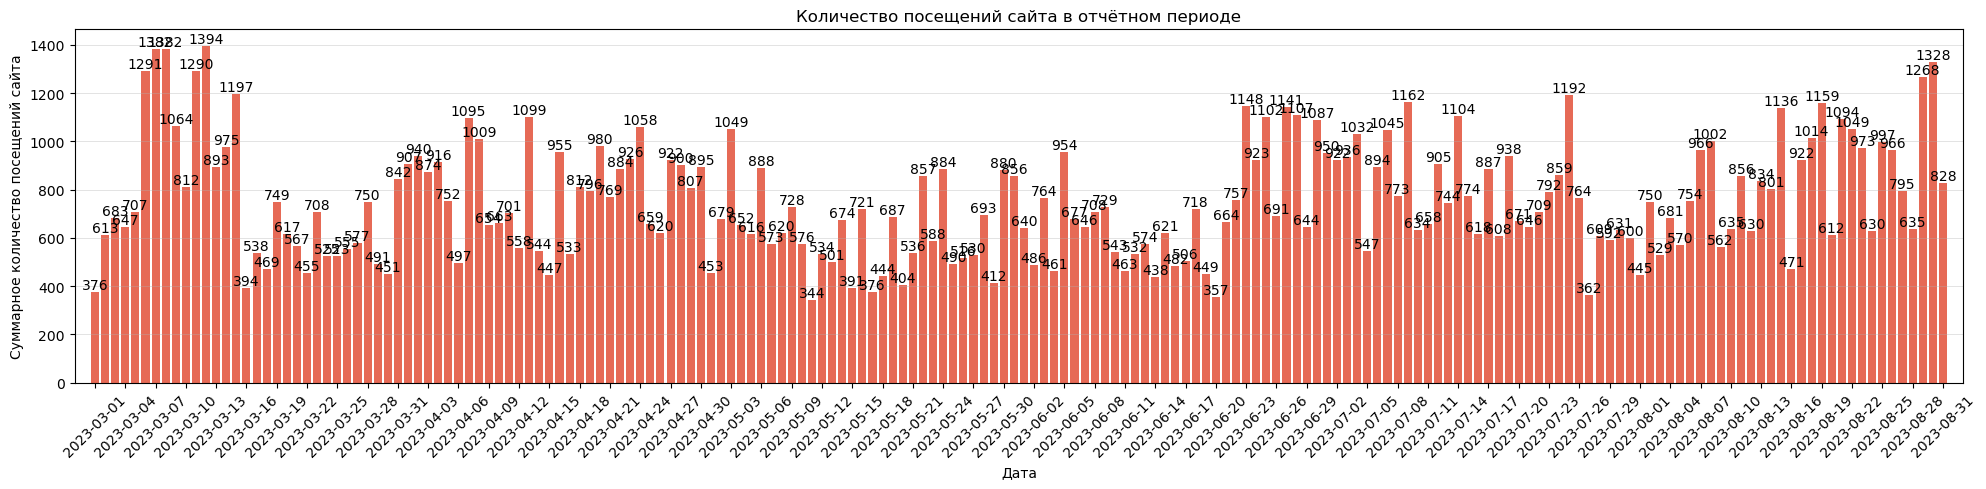

In [421]:
x = conv_ads['date_group']
y = conv_ads['visits']
plt.figure(figsize=(20, 5))
bars = plt.bar(x, y, color='#e66a56', label='Итоговые визиты')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
#plt.legend()
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=2), conv_ads['date_group'].max() + pd.Timedelta(days=2)])
plt.xticks(x[::3], x[::3], rotation=45, fontsize=10)
plt.ylabel('Суммарное количество посещений сайта')
plt.title('Количество посещений сайта в отчётном периоде')
plt.tight_layout()
plt.savefig('./charts/visits.png')

2. Итоговые визиты с разбивкой по платформам: web, android, ios

In [422]:
grouped_unique_visits = grouped_unique_visits.reset_index()

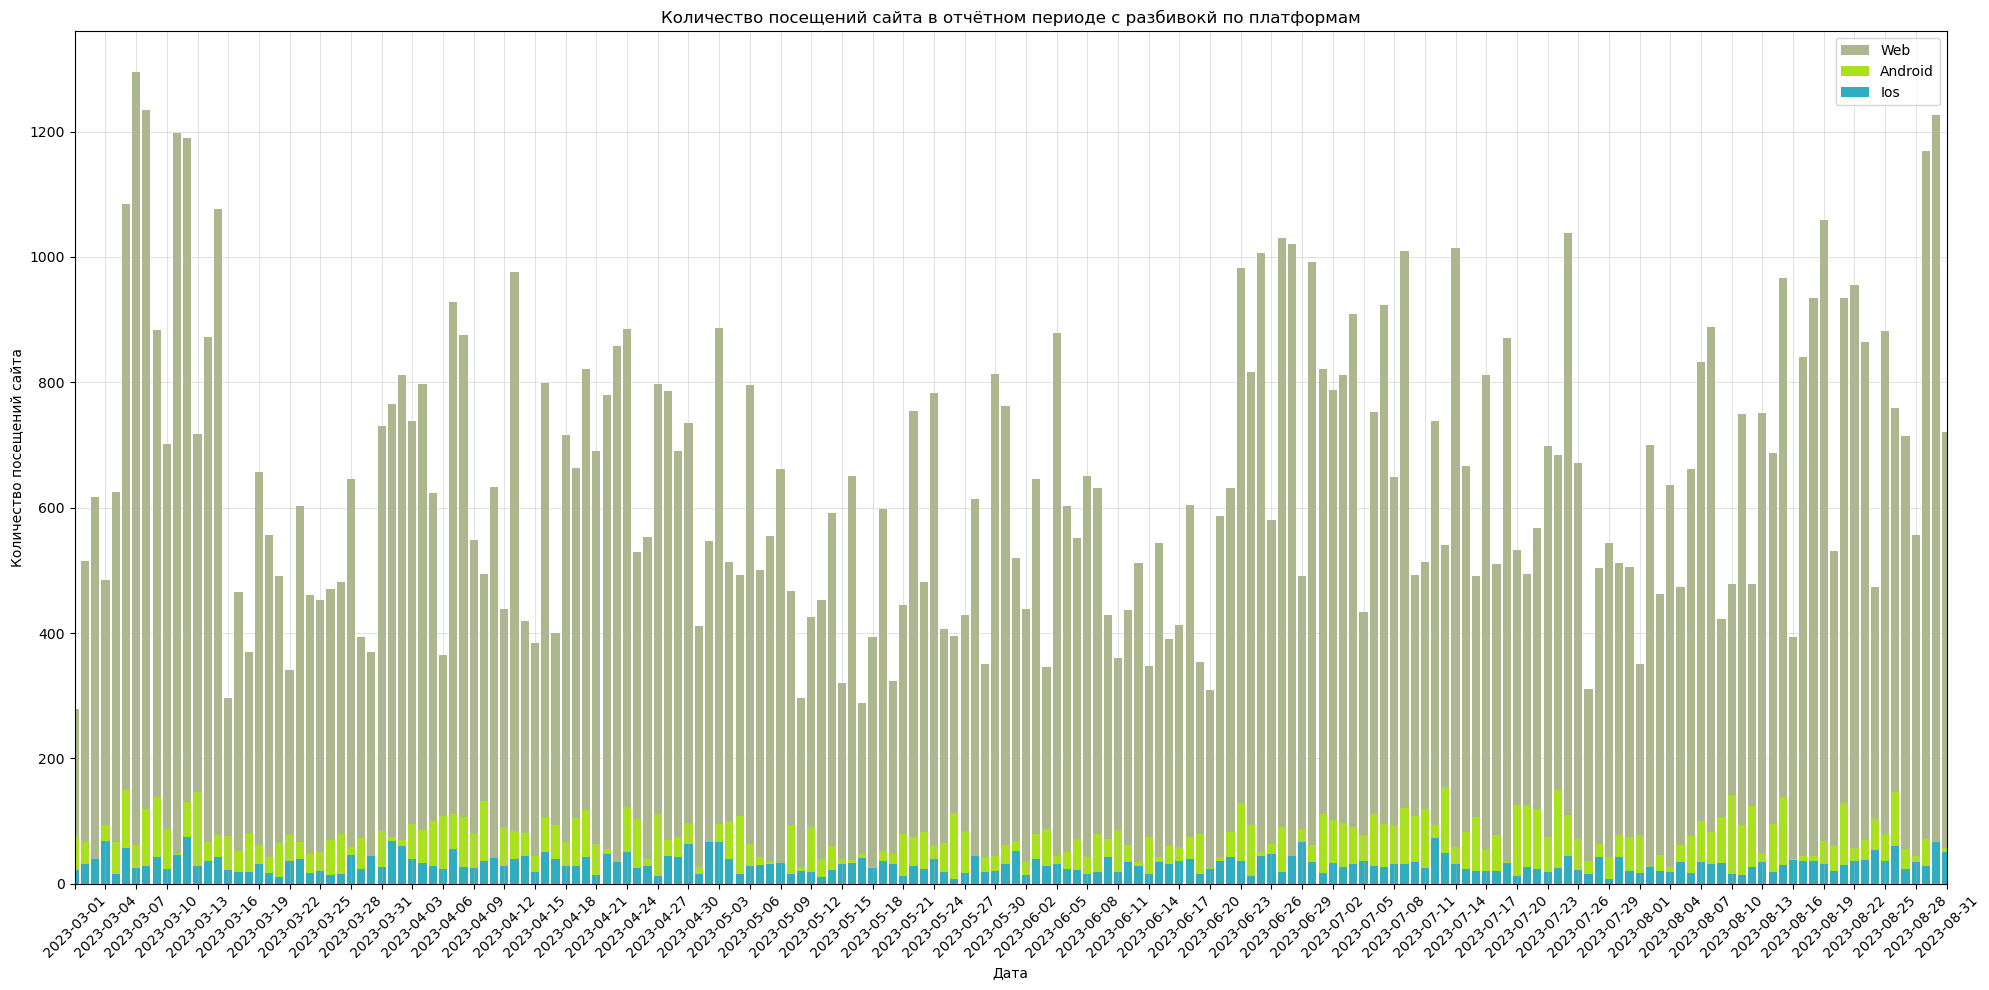

In [423]:
x = conv_ads['date_group']
android = grouped_unique_visits[grouped_unique_visits['platform'] == 'android']
web = grouped_unique_visits[grouped_unique_visits['platform'] == 'web']
ios = grouped_unique_visits[grouped_unique_visits['platform'] == 'ios']
plt.figure(figsize=(20, 10))
plt.bar(x, web['visits'], color='#acb78e', label='Web')
plt.bar(x, android['visits'], color='#aae11e', label='Android')
plt.bar(x, ios['visits'], color='#31adc1', label='Ios')
plt.legend(loc='upper right')
plt.grid(linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min(), conv_ads['date_group'].max()])
plt.xticks(x[::3], x[::3], rotation=45, fontsize=10)
plt.ylabel('Количество посещений сайта')
plt.title('Количество посещений сайта в отчётном периоде c разбивокй по платформам')
plt.tight_layout()
plt.savefig('./charts/visits_per_platform.png')

3. Итоговые регистрации

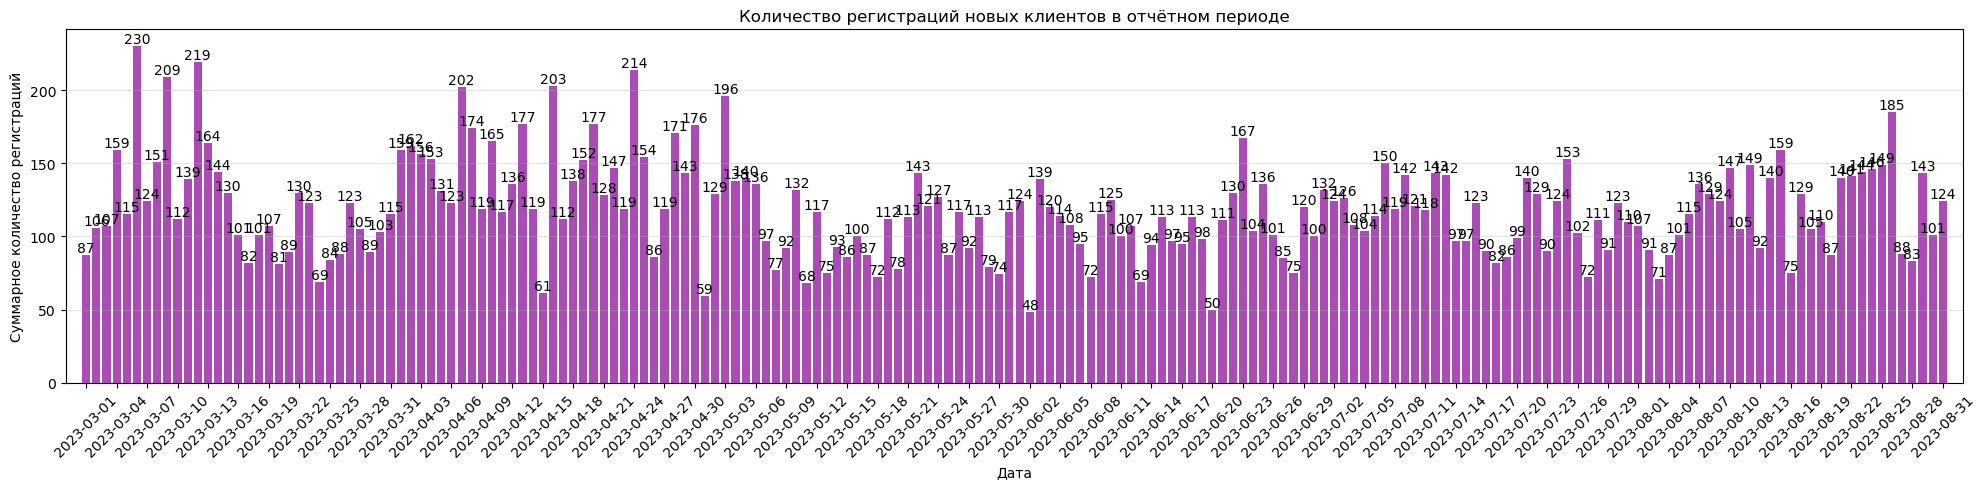

In [425]:
x = conv_ads['date_group']
y = conv_ads['registrations']
plt.figure(figsize=(20, 5))
bars = plt.bar(x, y, color='#ab4bb5', label='Итоговые визиты')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
#plt.legend()
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=2), conv_ads['date_group'].max() + pd.Timedelta(days=2)])
plt.xticks(x[::3], x[::3], rotation=45, fontsize=10)
plt.ylabel('Суммарное количество регистраций')
plt.title('Количество регистраций новых клиентов в отчётном периоде')
plt.tight_layout()
plt.savefig('./charts/registrations.png')

4. Итоговые регистрации с разбивкой по платформе: web, android, ios

In [426]:
grouped_registrations = grouped_registrations.reset_index()

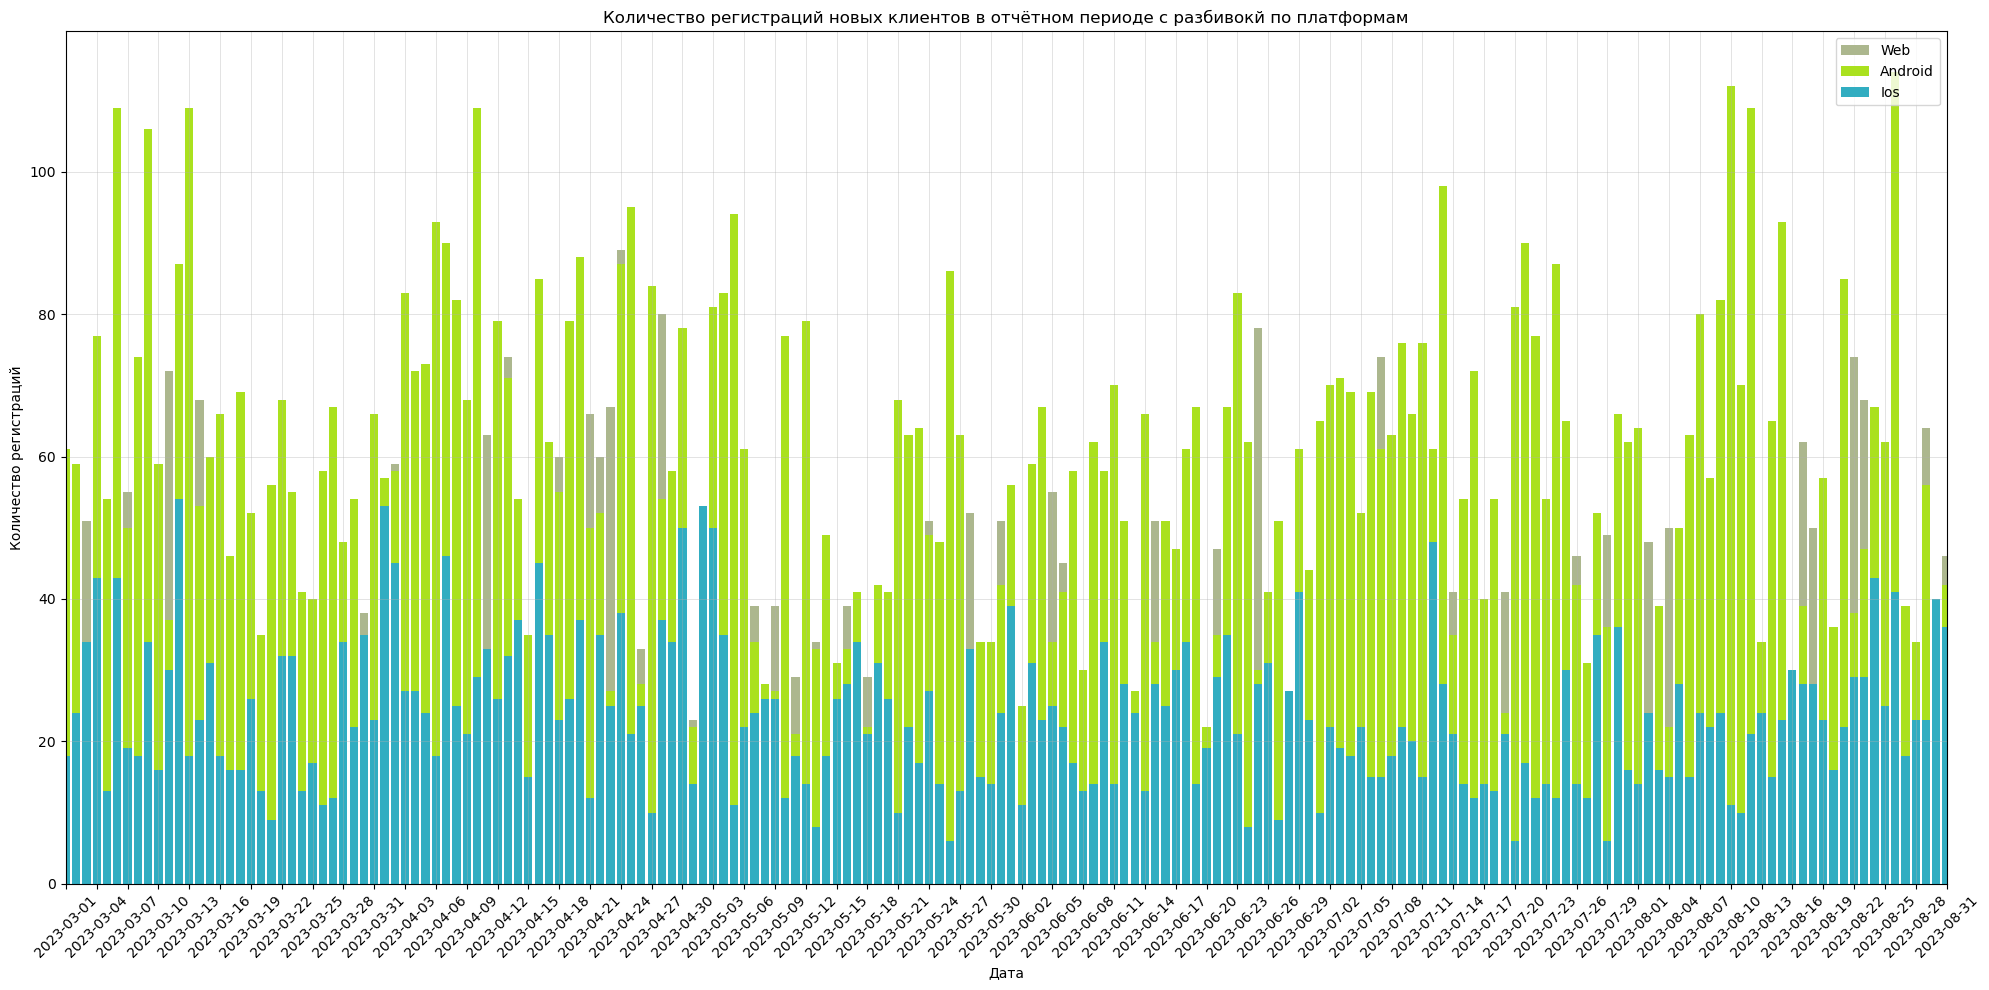

In [427]:
x = conv_ads['date_group']
android = grouped_registrations[grouped_registrations['platform'] == 'android']
web = grouped_registrations[grouped_registrations['platform'] == 'web']
ios = grouped_registrations[grouped_registrations['platform'] == 'ios']
plt.figure(figsize=(20, 10))
plt.bar(x, web['registrations'], color='#acb78e', label='Web')
plt.bar(x, android['registrations'], color='#aae11e', label='Android')
plt.bar(x, ios['registrations'], color='#31adc1', label='Ios')
plt.legend(loc='upper right')
plt.grid(linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min(), conv_ads['date_group'].max()])
plt.xticks(x[::3], x[::3], rotation=45, fontsize=10)
plt.ylabel('Количество регистраций')
plt.title('Количество регистраций новых клиентов в отчётном периоде c разбивокй по платформам')
plt.tight_layout()
plt.savefig('./charts/registrations_per_platform.png')

5. Конверсия по каждой платформе

In [428]:
x = conv_ads['date_group']
android_conv = conversions[conversions['platform'] == 'android']
android_conv = android_conv['conversion'].reset_index(drop=True)
web_conv = conversions[conversions['platform'] == 'web']
web_conv = web_conv['conversion'].reset_index(drop=True)
ios_conv = conversions[conversions['platform'] == 'ios']
ios_conv = ios_conv['conversion'].reset_index(drop=True)

plt.figure(figsize=(20, 15), constrained_layout=True)

plt.subplot(3, 1, 1)
plot = plt.plot(x, android_conv, color='#aae11e', label='Android', marker='o')
for dot, dot_val in enumerate(android_conv):
    plt.text(x[dot], android_conv[dot], f'{dot_val:.0f}%')
plt.grid(axis='both', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата', fontsize = 12)
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=1), conv_ads['date_group'].max() + pd.Timedelta(days=3)])
plt.xticks(x[::5], x[::5], rotation=45, fontsize=10)
plt.ylabel('Конверсия, %', fontsize = 12)
plt.title('Конверсия Android', fontsize = 14)

plt.subplot(3, 1, 2)
plot = plt.plot(x, web_conv, color='#acb78e', label='Web', marker='o')
for dot, dot_val in enumerate(web_conv):
    plt.text(x[dot], web_conv[dot], f'{dot_val:.0f}%')
plt.grid(axis='both', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата', fontsize = 12)
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=1), conv_ads['date_group'].max() + pd.Timedelta(days=3)])
plt.xticks(x[::5], x[::5], rotation=45, fontsize=10)
plt.ylabel('Конверсия, %', fontsize = 12)
plt.title('Конверсия Web', fontsize = 14)

plt.subplot(3, 1, 3)
plot = plt.plot(x, ios_conv, color='#31adc1', label='Итоговые визиты', marker='o')
for dot, dot_val in enumerate(ios_conv):
    plt.text(x[dot], ios_conv[dot], f'{dot_val:.0f}%')
plt.grid(axis='both', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата', fontsize = 12)
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=1), conv_ads['date_group'].max() + pd.Timedelta(days=3)])
plt.xticks(x[::5], x[::5], rotation=45, fontsize=10)
plt.ylabel('Конверсия, %', fontsize = 12)
plt.title('Конверсия Ios', fontsize = 14)

plt.savefig('./charts/conversion_per_platform.png')

KeyError: 'platform'

6. Средняя конверсия

In [299]:
conv_grouped = conv_ads[['date_group', 'visits', 'registrations']]
conv_grouped = conv_grouped.copy()
conv_grouped.loc[:, 'conversion_overall'] = conv_grouped['registrations'] / conv_grouped['visits'] * 100

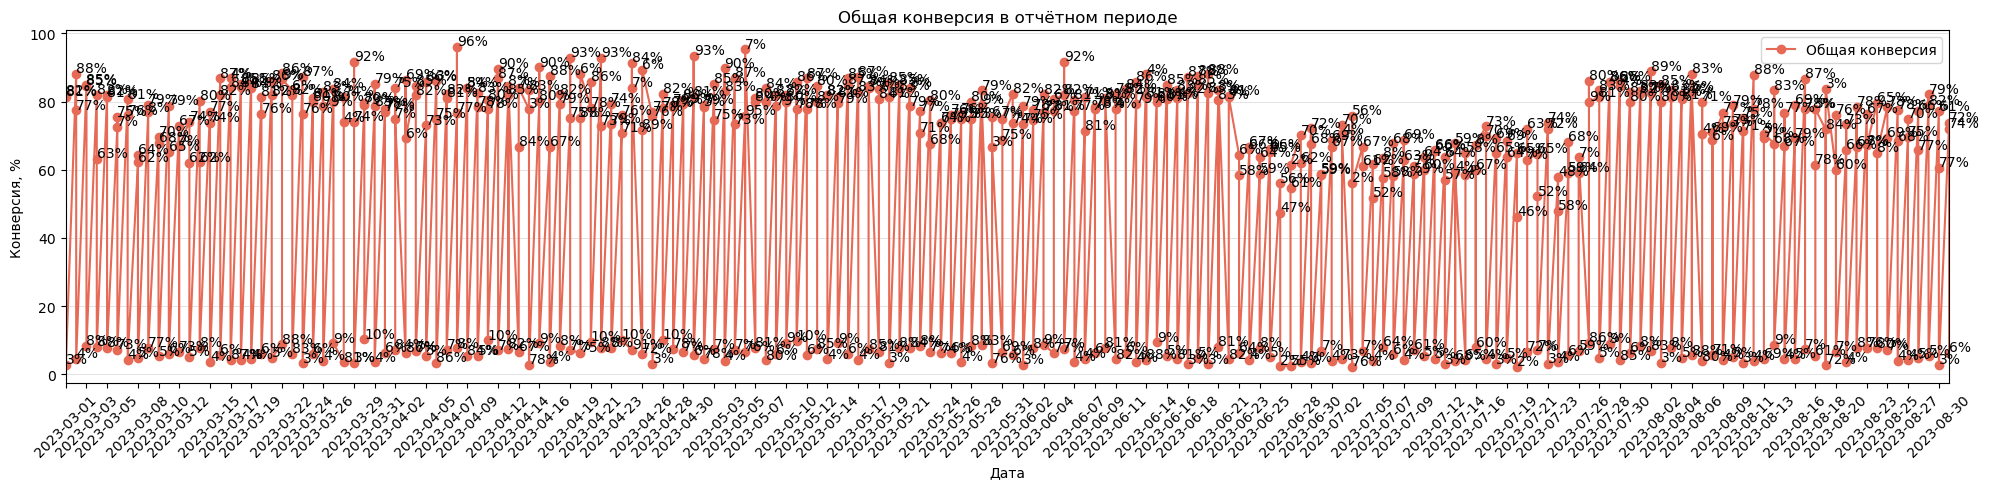

In [300]:
x = conv_grouped['date_group']
y = conv_grouped['conversion_overall']
plt.figure(figsize=(20, 5))
plot = plt.plot(x, y, color='#e66a56', label='Общая конверсия', marker='o')
for dot, dot_val in enumerate(y):
    plt.text(x[dot], y[dot] + 0.5, f'{dot_val:.0f}%')
plt.legend()
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min(), conv_ads['date_group'].max()])
plt.xticks(x[::7], x[::7], rotation=45, fontsize=10)
plt.ylabel('Конверсия, %')
plt.title('Общая конверсия в отчётном периоде')
plt.tight_layout()
plt.savefig('./charts/conversion_overall.png')

7. Стоимости реклам

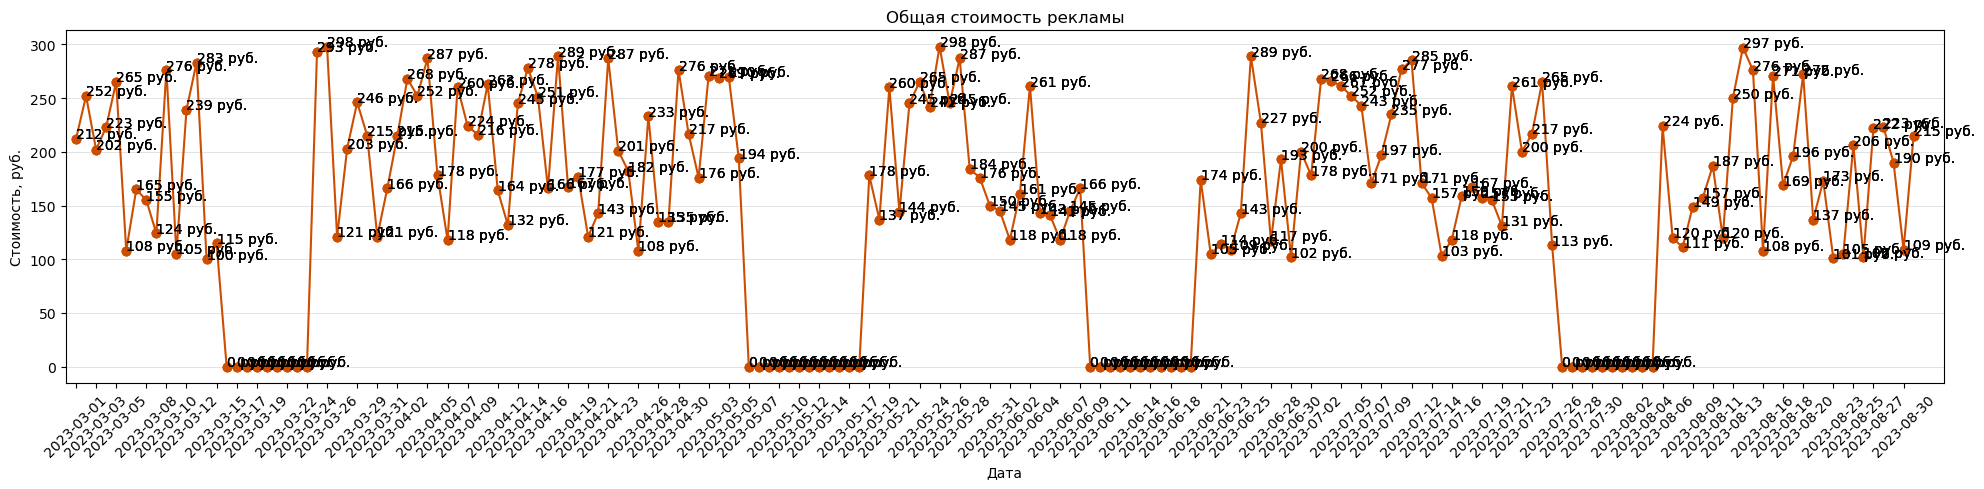

In [301]:
x = conv_ads['date_group']
y = conv_ads['cost']
plt.figure(figsize=(20, 5))
plot = plt.plot(x, y, color='#cd4e00', label='Общая стоимость рекламы', marker='o')
for dot, dot_val in enumerate(y):
    plt.text(x[dot], y[dot] + 0.5, f'{dot_val:.0f} руб.')
#plt.legend()
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=1), conv_ads['date_group'].max() + pd.Timedelta(days=3)])
plt.xticks(x[::7], x[::7], rotation=45, fontsize=10)
plt.ylabel('Стоимость, руб.')
plt.title('Общая стоимость рекламы')
plt.tight_layout()
plt.savefig('./charts/campaign_cost_overall.png')

8. Визиты за весь период с цветовым выделением рекламной кампании

In [302]:
campaigns_period = conv_ads[conv_ads['utm_campaign'] != 'none']
campaign_date = campaigns_period.groupby('utm_campaign')['date_group'].agg(['min', 'max']).reset_index()
campaign_date['color'] = ['#8dbf40', '#cd5b45', '#32a4ba', '#f3ea16','#ababab']
campaign_date.columns = ['campaign', 'begin', 'end', 'color']

In [303]:
сolors = ['#8dbf40', '#cd5b45', '#32a4ba', '#f3ea16','#ababab']
color_list = []
for campaign_number in range(len(campaign_date)):
    color_list.append(сolors[campaign_number % 5])

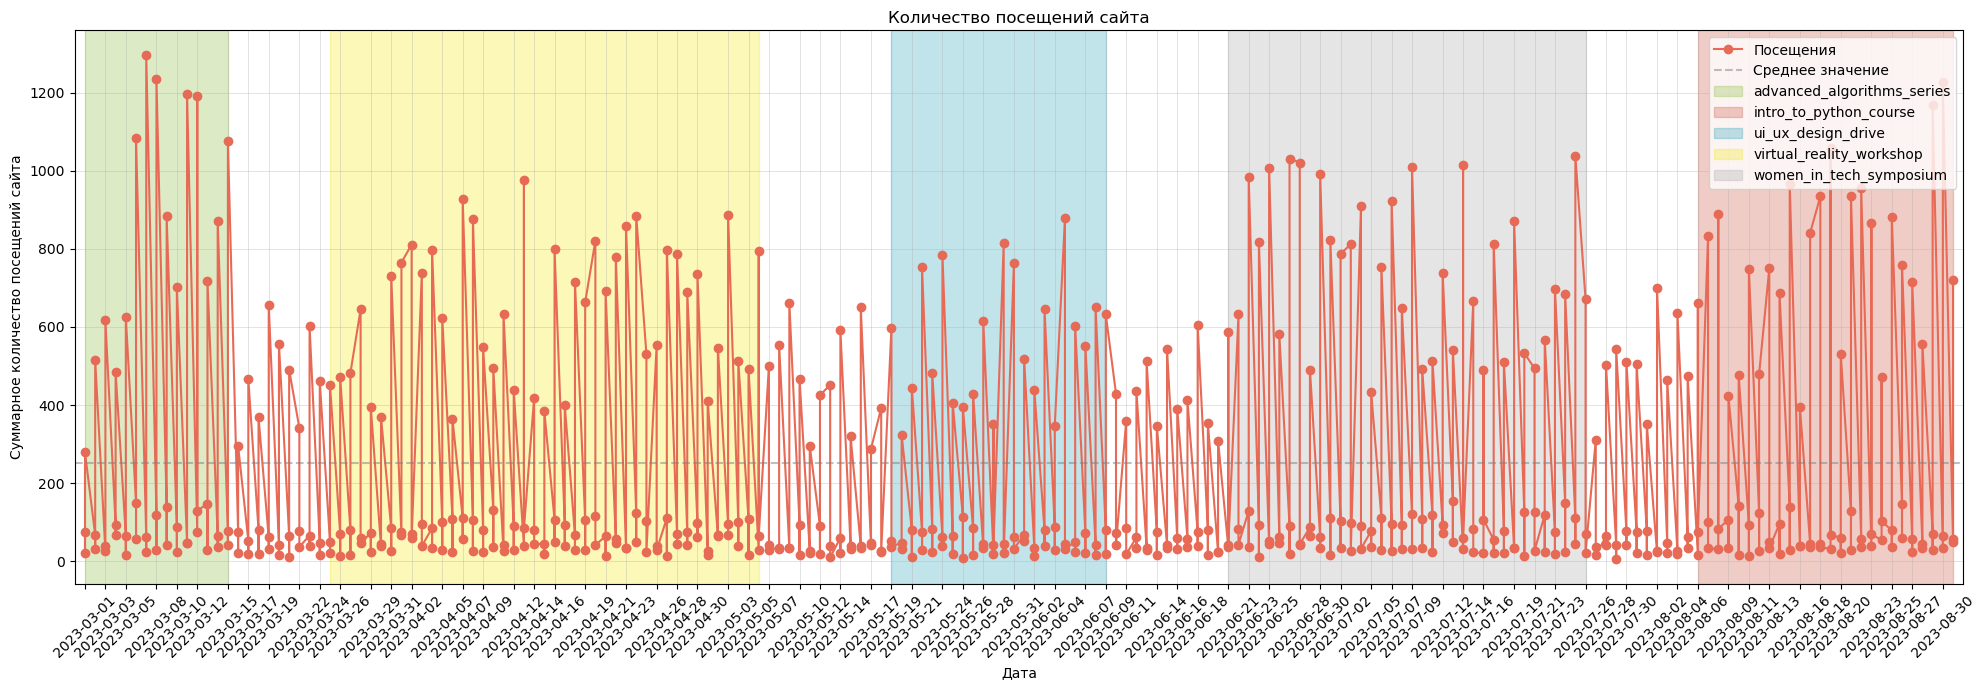

In [304]:
x = conv_ads['date_group']
y = conv_ads['visits']
plt.figure(figsize=(20, 7))
bars = plt.plot(x, y, color='#e66a56', label='Посещения', marker='o')
plt.grid(axis='both', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min() - pd.Timedelta(days=1), conv_ads['date_group'].max() + pd.Timedelta(days=1)])
plt.xticks(x[::7], x[::7], rotation=45, fontsize=10)
plt.ylabel('Суммарное количество посещений сайта')
plt.title('Количество посещений сайта')
plt.axhline(y.mean(), color='gray', linestyle='--', label='Среднее значение', alpha=0.5)
for campaign_number in range(len(campaign_date)):
    plt.axvspan(campaign_date['begin'].iloc[campaign_number], campaign_date['end'].iloc[campaign_number], color=color_list[campaign_number], alpha=0.3, label=campaign_date['campaign'].iloc[campaign_number])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./charts/visits_with_campaigns.png')

9. Регистрации за весь период с цветовым выделением рекламной кампании

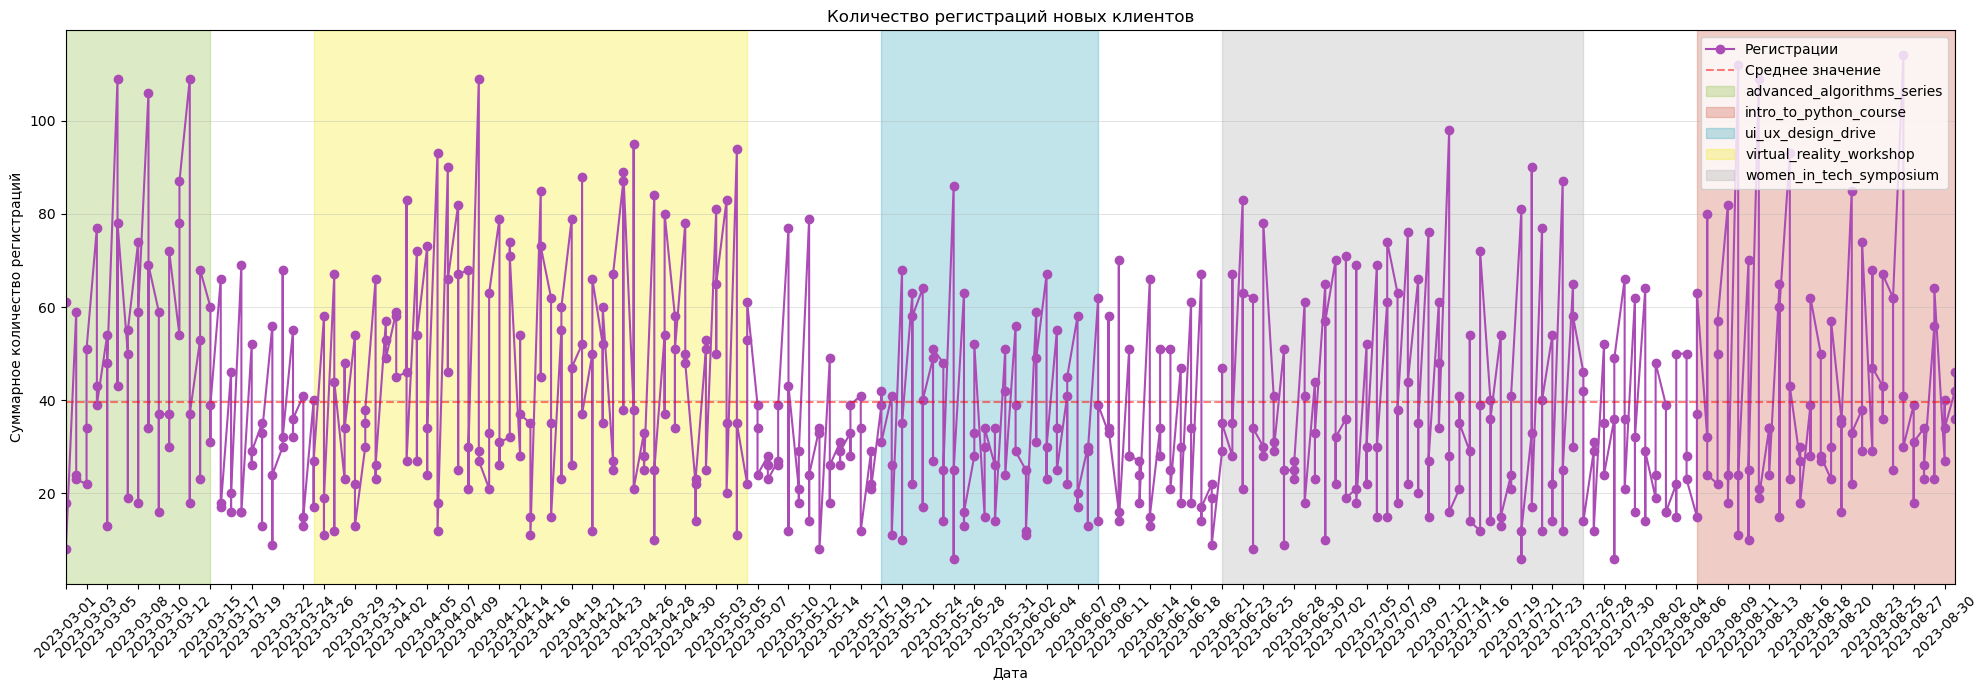

In [305]:
x = conv_ads['date_group']
y = conv_ads['registrations']
plt.figure(figsize=(20, 7))
bars = plt.plot(x, y, color='#ab4bb5', label='Регистрации', marker='o')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xlabel('Дата')
plt.xlim([conv_ads['date_group'].min(), conv_ads['date_group'].max()])
plt.xticks(x[::7], x[::7], rotation=45, fontsize=10)
plt.ylabel('Суммарное количество регистраций')
plt.title('Количество регистраций новых клиентов')
plt.axhline(y.mean(), color='red', linestyle='--', label='Среднее значение', alpha=0.5)
for campaign_number in range(len(campaign_date)):
    plt.axvspan(campaign_date['begin'].iloc[campaign_number], campaign_date['end'].iloc[campaign_number], color=color_list[campaign_number], alpha=0.3, label=campaign_date['campaign'].iloc[campaign_number])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./charts/registrations_with_campaigns.png')